In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import urllib3
from bs4 import BeautifulSoup
from collections import defaultdict
import requests

In [14]:
scholar = 'https://scholar.google.nl/citations?user=NaSxLIQAAAAJ&hl=en&oe=ASCII'
nodes=100

In [15]:
def getGraph(seed, Nmax):
    urls = defaultdict(int)
    urls[seed]+=1
    newUrls = [seed]
    G = nx.DiGraph()
    
    def coAuthors(url):
        print(url)
        coUrls = []
        coNames = []
        response = requests.get(url)
        soup = BeautifulSoup(response.content, "html.parser")
        s = soup.body.findAll('a', {"tabindex": "-1"})
        egoName = soup.body.find('div', {"id": "gsc_prf_in"}).text 
        print(egoName)
        print("******")
        if s:
            for i in s:
                coNames.append(i.text) 
                #for network plot
                coUrls.append('http://scholar.google.nl'+ i['href'])
        for j in coUrls:
            urls[j] += 0
        for m in coNames:
            G.add_edge(egoName.split(',')[0], m.split(',')[0], weight = 1)
        return coUrls
    
    while newUrls:
        for k in urls.keys(): 
            # update url.values() first
            urls[k] += 1 
        addUrls = [] 
        # get new-added authors, may have duplications.
        for i in newUrls:
            
            #coAuthors(i)
            coUrls = coAuthors(i)
            if coUrls:
                for j in coUrls:
                    addUrls.append(j)
        for m in set(addUrls): 
            # get rid of the duplications
            urls[m] += 0
        newUrls = [k for k, v in urls.items() if v <= 1]
        # This is for updating the new coauthors and avoid the deadloop: a->b->a->......
        addUrls = []   
        print(len(urls.keys()))
        if len(urls.keys()) > Nmax:
            print('more than '+str(Nmax)+' people now, break')
            break
        print(newUrls)
    return G


In [16]:
def getName(seed, Nmax):
    #urls = defaultdict(int)
    G = nx.DiGraph()
    response = requests.get(seed)
    soup = BeautifulSoup(response.content, "html.parser")
    egoName = soup.body.find('div', {"id": "gsc_prf_in"}).text 
    print(egoName)
    return egoName

In [21]:
#get Name of the author
name = getName(scholar, nodes)

Andrew Leigh


In [18]:
#get coauthor List
g = getGraph(scholar, nodes)

https://scholar.google.nl/citations?user=NaSxLIQAAAAJ&hl=en&oe=ASCII
Andrew Leigh
******
4
['http://scholar.google.nl/citations?hl=en&oe=ASCII&user=NaSxLIQAAAAJ&view_op=list_works', 'http://scholar.google.nl/citations?hl=en&oe=ASCII&user=NaSxLIQAAAAJ&view_op=list_works&sortby=pubdate', 'http://scholar.google.nl/citations?hl=en&oe=ASCII&user=NaSxLIQAAAAJ&view_op=list_works&sortby=title']
http://scholar.google.nl/citations?hl=en&oe=ASCII&user=NaSxLIQAAAAJ&view_op=list_works
Andrew Leigh
******
http://scholar.google.nl/citations?hl=en&oe=ASCII&user=NaSxLIQAAAAJ&view_op=list_works&sortby=pubdate
Andrew Leigh
******
http://scholar.google.nl/citations?hl=en&oe=ASCII&user=NaSxLIQAAAAJ&view_op=list_works&sortby=title
Andrew Leigh
******
4
['http://scholar.google.nl/citations?hl=en&oe=ASCII&user=NaSxLIQAAAAJ&view_op=list_works', 'http://scholar.google.nl/citations?hl=en&oe=ASCII&user=NaSxLIQAAAAJ&view_op=list_works&sortby=pubdate', 'http://scholar.google.nl/citations?hl=en&oe=ASCII&user=NaSxLIQ

In [19]:
def plot_(g):
    plt.figure(figsize = (30, 30))
    pos = nx.spring_layout(g) 
    nx.draw_networkx_labels(g, pos, font_color='k', font_size = 14)
    nx.draw(g, pos, node_size = 20, edge_color = 'grey', width = 0.4, arrows = True)
    #str1=name
    str2="'s Google Scholar Network"
    myTitle=str(name)+str2
    plt.title(myTitle, fontsize=40)
    #plt.xticks([])
    #plt.yticks([])
    plt.show()

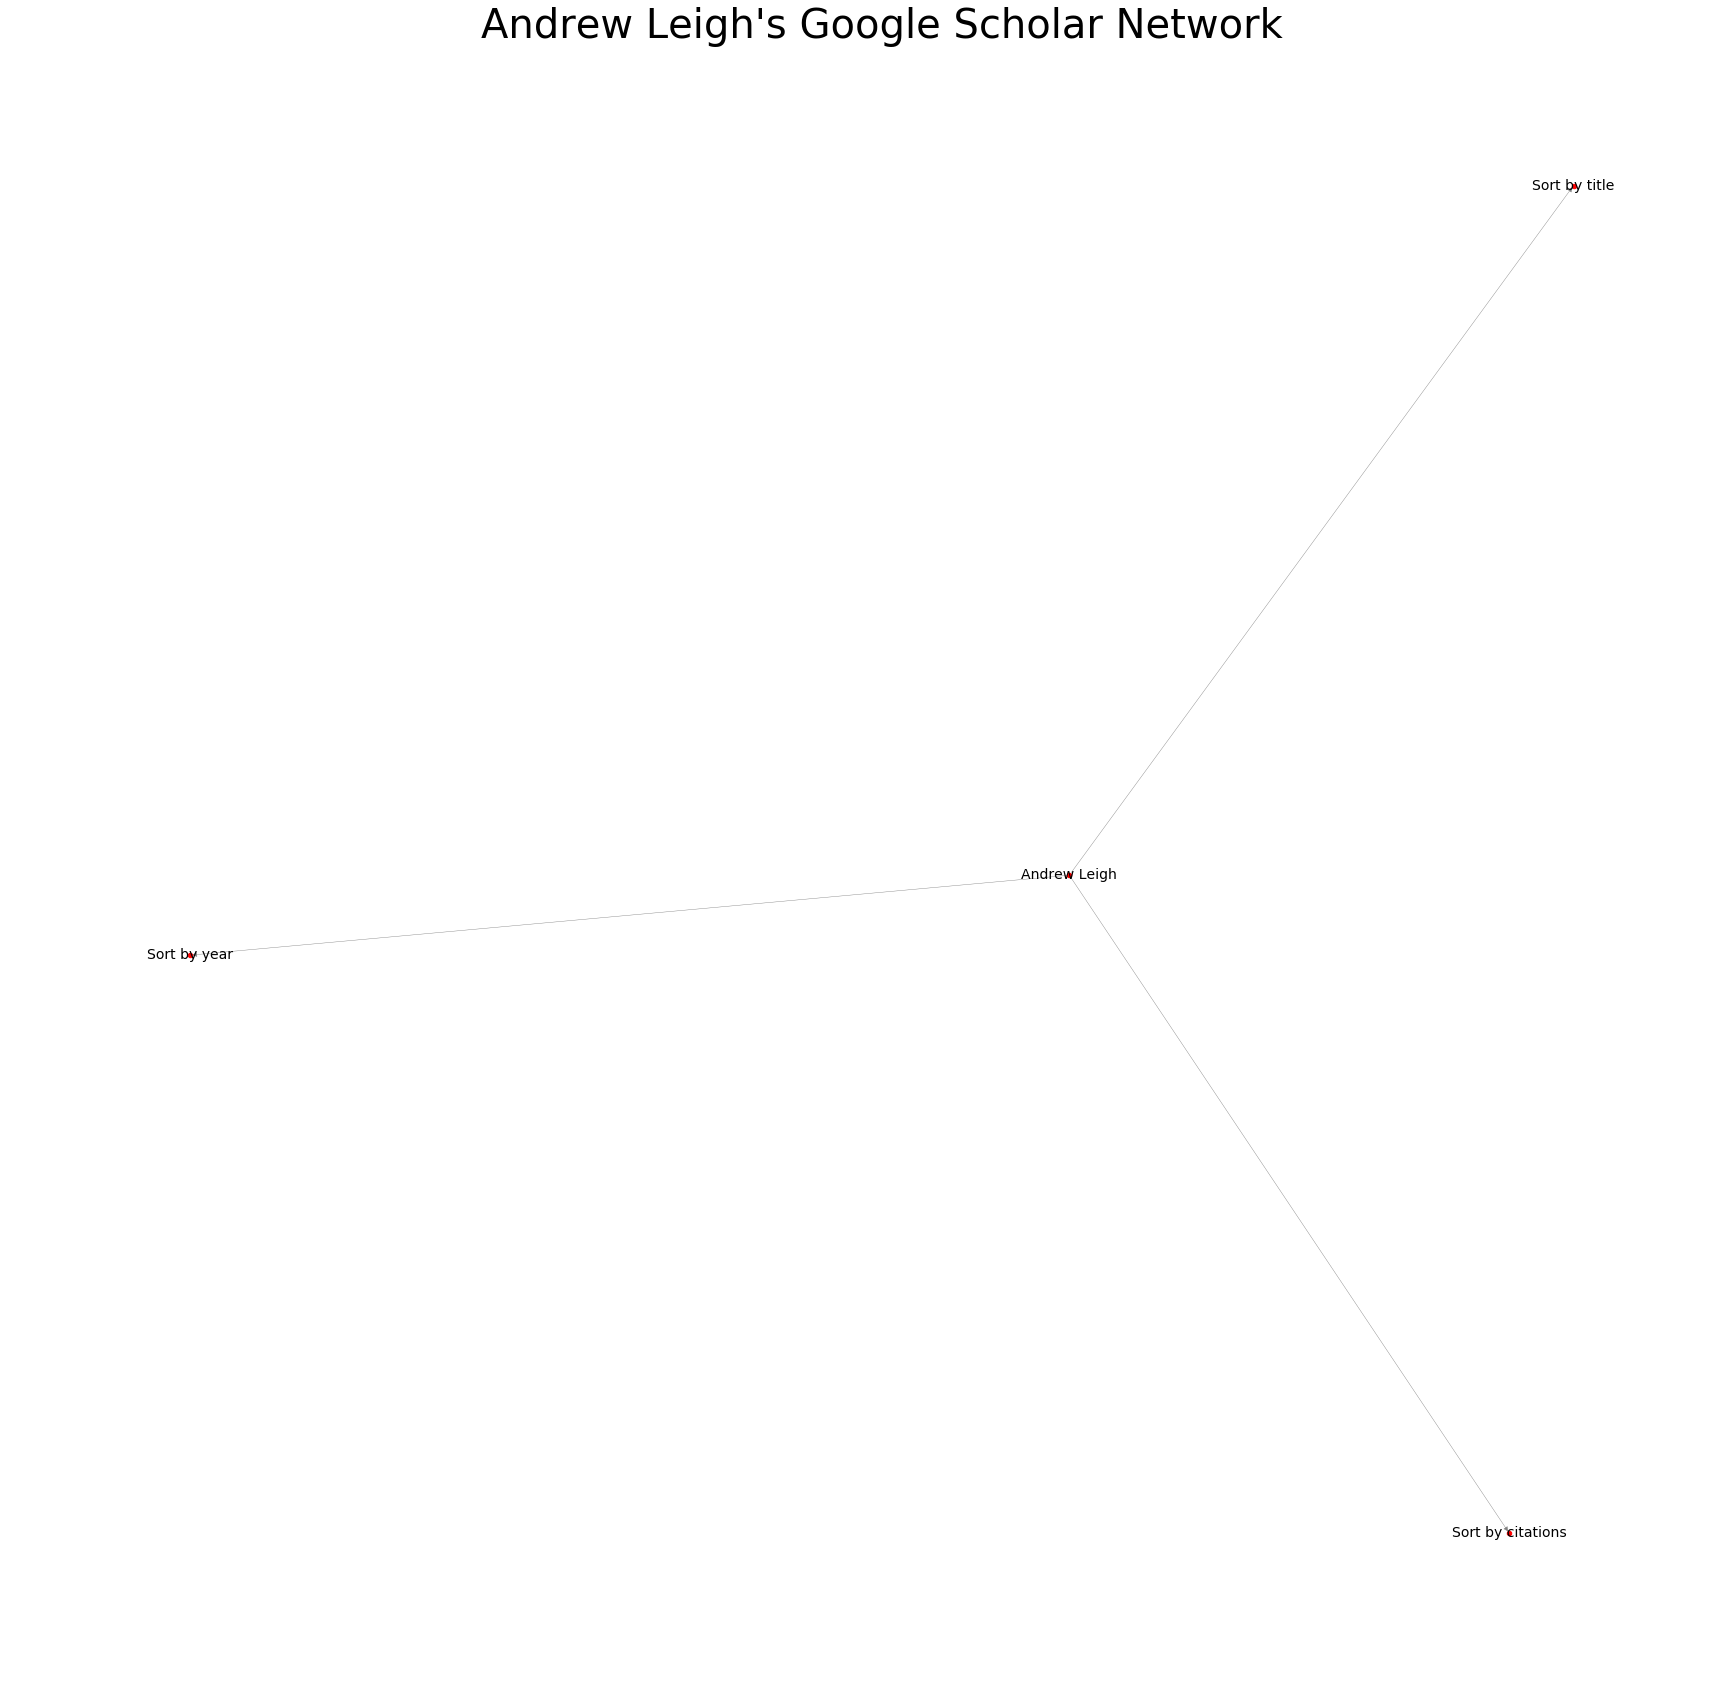

In [20]:
plot_(g)

In [10]:
#create Important subnetwork
def page_Rank(G):
    print("Google Page Rank Algoritham\n")
    #rank=nx.pagerank(G).items()
    #rank=nx.betweenness_centrality(G).items()
    rank=nx.degree_centrality(G).items()
    #print(rank)
    for k,v in rank :
        print("Page Rank Centrality :",k,'\t',v)
        
    r = [x[1] for x in rank]
    rsum = sum(r)
    rlen = len(r)
    rfac = rsum/rlen
    Gt = G.copy()
    
    for k, v in rank:
        if v < rfac:
            Gt.remove_node(k)
    return Gt

In [11]:
Gt = page_Rank(g)

Google Page Rank Algoritham

Page Rank Centrality : Justin Wolfers 	 0.18333333333333335
Page Rank Centrality : Betsey Stevenson 	 0.02777777777777778
Page Rank Centrality : Eric Zitzewitz 	 0.061111111111111116
Page Rank Centrality : Erik Snowberg 	 0.13333333333333333
Page Rank Centrality : olivier blanchard 	 0.13333333333333333
Page Rank Centrality : Andrew Leigh 	 0.022222222222222223
Page Rank Centrality : Joseph Price 	 0.06666666666666667
Page Rank Centrality : Daniel Sacks 	 0.022222222222222223
Page Rank Centrality : N. Gregory Mankiw 	 0.1388888888888889
Page Rank Centrality : Ricardo Reis 	 0.09444444444444444
Page Rank Centrality : Cass Sunstein 	 0.07777777777777778
Page Rank Centrality : Refet S. Gürkaynak 	 0.09444444444444444
Page Rank Centrality : Devin Pope 	 0.022222222222222223
Page Rank Centrality : Bo Cowgill 	 0.12222222222222223
Page Rank Centrality : David Rothschild 	 0.1
Page Rank Centrality : Emile Servan-Schreiber 	 0.061111111111111116
Page Rank Centralit

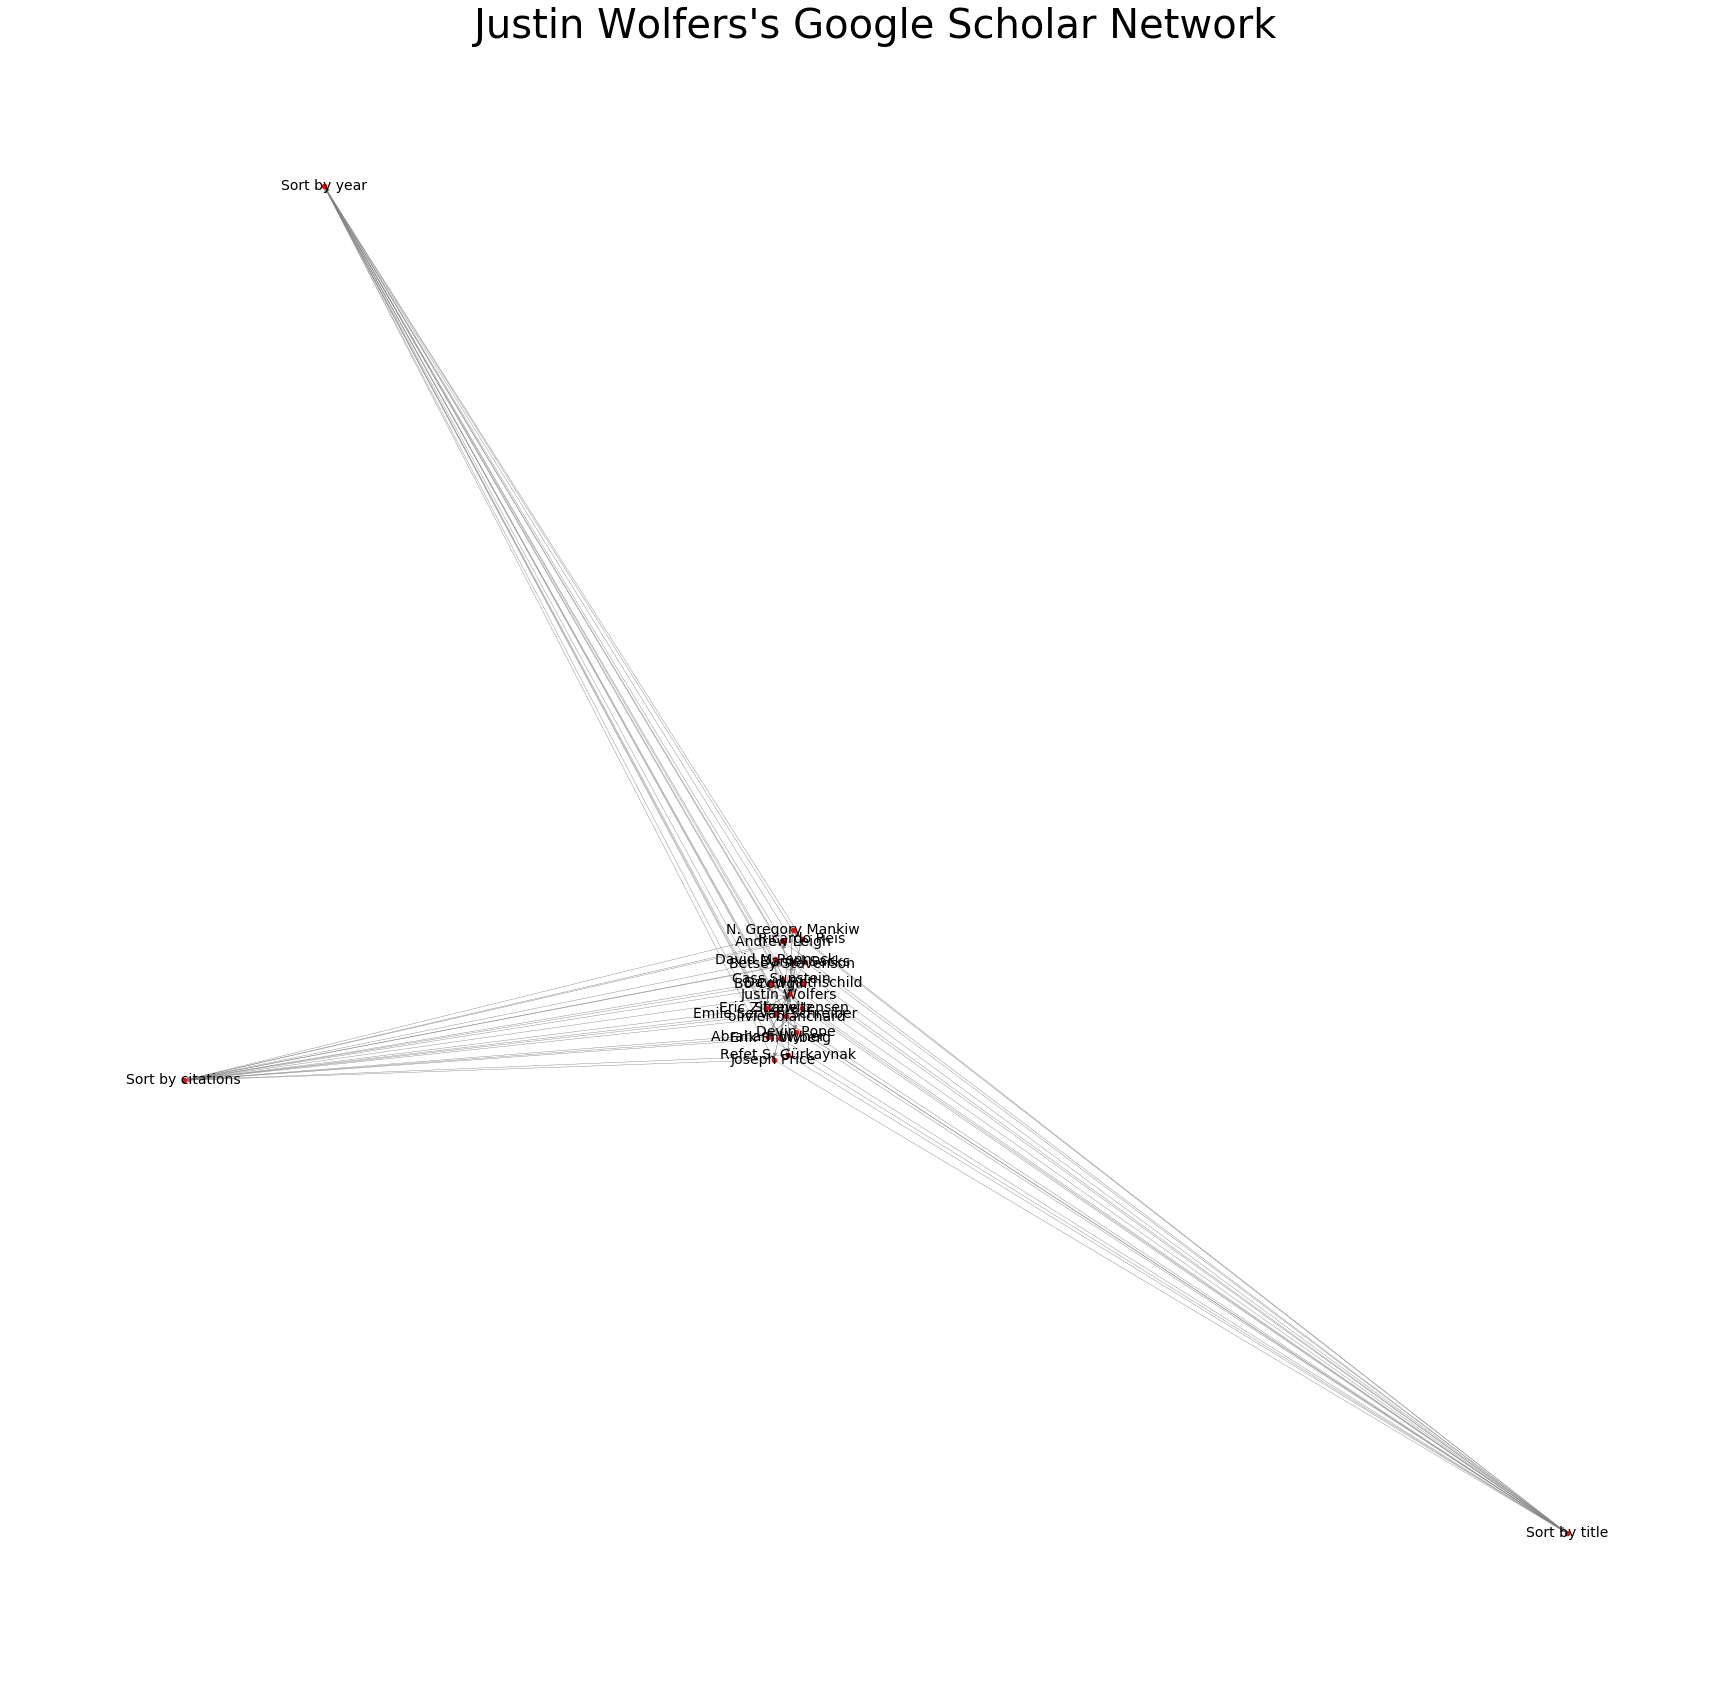

In [12]:
plot_(Gt)

In [12]:
mylist=[]
degree =  g.degree()
for k,v in degree :
    print('Degree of Each Node :',k,'\t',v)
    mylist.append(v)

Degree of Each Node : Justin Wolfers 	 33
Degree of Each Node : Betsey Stevenson 	 5
Degree of Each Node : Eric Zitzewitz 	 11
Degree of Each Node : Erik Snowberg 	 24
Degree of Each Node : olivier blanchard 	 25
Degree of Each Node : Andrew Leigh 	 4
Degree of Each Node : Joseph Price 	 12
Degree of Each Node : Daniel Sacks 	 4
Degree of Each Node : N. Gregory Mankiw 	 25
Degree of Each Node : Ricardo Reis 	 17
Degree of Each Node : Cass Sunstein 	 14
Degree of Each Node : Refet S. Gürkaynak 	 17
Degree of Each Node : Devin Pope 	 4
Degree of Each Node : Bo Cowgill 	 22
Degree of Each Node : David Rothschild 	 18
Degree of Each Node : Emile Servan-Schreiber 	 11
Degree of Each Node : David M Pennock 	 26
Degree of Each Node : Shane Jensen 	 10
Degree of Each Node : Abraham Wyner 	 21
Degree of Each Node : Sort by citations 	 19
Degree of Each Node : Sort by year 	 19
Degree of Each Node : Sort by title 	 19
Degree of Each Node : Jonathan Reuter 	 1
Degree of Each Node : Jonathan Zinma

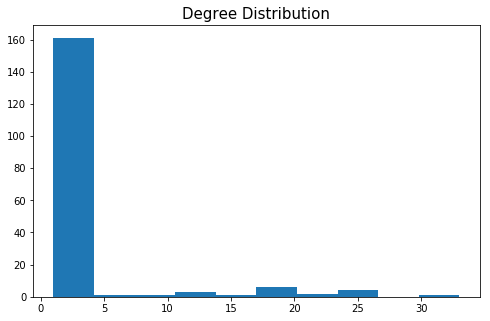

In [12]:
plt.figure(figsize = (8, 5))
plt.hist(mylist)
plt.title("Degree Distribution", fontsize = 15)
plt.show()

In [14]:
centality_value = []
centrality =  nx.degree_centrality(g)
for each in centrality.items():
    print('Degree Centrality: ', each[0], '\t', each[1])
    centality_value.append(each[1])

Degree Centrality:  Justin Wolfers 	 0.18435754189944134
Degree Centrality:  Betsey Stevenson 	 0.02793296089385475
Degree Centrality:  Eric Zitzewitz 	 0.06145251396648045
Degree Centrality:  Erik Snowberg 	 0.1340782122905028
Degree Centrality:  olivier blanchard 	 0.13966480446927373
Degree Centrality:  Andrew Leigh 	 0.0223463687150838
Degree Centrality:  Joseph Price 	 0.0670391061452514
Degree Centrality:  Daniel Sacks 	 0.0223463687150838
Degree Centrality:  N. Gregory Mankiw 	 0.13966480446927373
Degree Centrality:  Ricardo Reis 	 0.09497206703910614
Degree Centrality:  Cass Sunstein 	 0.0782122905027933
Degree Centrality:  Refet S. Gürkaynak 	 0.09497206703910614
Degree Centrality:  Devin Pope 	 0.0223463687150838
Degree Centrality:  Bo Cowgill 	 0.1229050279329609
Degree Centrality:  David Rothschild 	 0.1005586592178771
Degree Centrality:  Emile Servan-Schreiber 	 0.06145251396648045
Degree Centrality:  David M Pennock 	 0.1452513966480447
Degree Centrality:  Shane Jensen 	 

In [15]:
avg_centrality =  sum(centrality.values())/len(centrality)
print('Average Degree Centrality: ', avg_centrality)

Avergage Degree Centrality:  0.016263190564866588


In [16]:
#create dataframe
import pandas as pd
y=list(centrality.values())
x=list(centrality.keys())
data = {'keys':x,'values':y}
df1 = pd.DataFrame.from_dict(data)

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
fig = px.histogram(df1,
        x = "values",
        title = 'Degree Centrality Distribution', 
        #xaxis_title_text='Value',
        labels={'Number of coauthors':'centrality distribution'},
        color_discrete_sequence=['indianred'],
        opacity=0.9
        #log_y=True,
        )
fig.update_layout(
    xaxis_title_text='Degree', # xaxis label
    yaxis_title_text='Number of coauthors', # yaxis label
    #bargap=0.2, # gap between bars of adjacent location coordinates
    #bargroupgap=0.1 # gap between bars of the same location coordinates
)
#layout = go.Layout(title=go.layout.Title(text='Degree Centrality Distribution'),xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Number of Coauthors')),yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Degree Centrality')))
#fig = go.Figure(data=data,layout=layout)
fig.show()

In [17]:
close = nx.closeness_centrality(g)    
for each in close.items():
    print('Closeness Centrality: ', each[0], '\t', each[1])

Closeness Centrality:  Justin Wolfers 	 0.06743814844373504
Closeness Centrality:  Betsey Stevenson 	 0.036312849162011177
Closeness Centrality:  Eric Zitzewitz 	 0.039338919925512104
Closeness Centrality:  Erik Snowberg 	 0.03776536312849162
Closeness Centrality:  olivier blanchard 	 0.03776536312849162
Closeness Centrality:  Andrew Leigh 	 0.03910614525139665
Closeness Centrality:  Joseph Price 	 0.036312849162011177
Closeness Centrality:  Daniel Sacks 	 0.03910614525139665
Closeness Centrality:  N. Gregory Mankiw 	 0.03776536312849162
Closeness Centrality:  Ricardo Reis 	 0.03776536312849162
Closeness Centrality:  Cass Sunstein 	 0.03910614525139665
Closeness Centrality:  Refet S. Gürkaynak 	 0.036312849162011177
Closeness Centrality:  Devin Pope 	 0.03910614525139665
Closeness Centrality:  Bo Cowgill 	 0.03776536312849162
Closeness Centrality:  David Rothschild 	 0.036312849162011177
Closeness Centrality:  Emile Servan-Schreiber 	 0.036312849162011177
Closeness Centrality:  David M

In [18]:
y=list(close.values())
x=list(close.keys())
data = {'keys':x,'values':y}
df1 = pd.DataFrame.from_dict(data)

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
fig = px.histogram(df1,
        x = "values",
        title = 'Clossness Centrality Distribution', 
        #xaxis_title_text='Value',
        labels={'Number of coauthors':'centrality distribution'},
        #color_discrete_sequence=['indianred'],
        opacity=0.9
        #log_y=True,
        )
fig.update_layout(
    xaxis_title_text='closeness centrality', # xaxis label
    yaxis_title_text='Number of coauthors', # yaxis label
    #bargap=0.2, # gap between bars of adjacent location coordinates
    #bargroupgap=0.1 # gap between bars of the same location coordinates
)
#layout = go.Layout(title=go.layout.Title(text='Degree Centrality Distribution'),xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Number of Coauthors')),yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Degree Centrality')))
#fig = go.Figure(data=data,layout=layout)
fig.show()

In [19]:
btwn = nx.betweenness_centrality(g, weight='weight')
for each in btwn.items():
    print('Betweeness Centrality: ', each[0], '\t', each[1])

Betweeness Centrality:  Justin Wolfers 	 0.06181867637520139
Betweeness Centrality:  Betsey Stevenson 	 0.0
Betweeness Centrality:  Eric Zitzewitz 	 0.001344339129161174
Betweeness Centrality:  Erik Snowberg 	 0.0067373883204653396
Betweeness Centrality:  olivier blanchard 	 0.007516791161885631
Betweeness Centrality:  Andrew Leigh 	 0.0
Betweeness Centrality:  Joseph Price 	 0.0028560667880233506
Betweeness Centrality:  Daniel Sacks 	 0.0
Betweeness Centrality:  N. Gregory Mankiw 	 0.006810620802209528
Betweeness Centrality:  Ricardo Reis 	 0.0038603979662293637
Betweeness Centrality:  Cass Sunstein 	 0.004393948904651309
Betweeness Centrality:  Refet S. Gürkaynak 	 0.004896114493754315
Betweeness Centrality:  Devin Pope 	 0.0
Betweeness Centrality:  Bo Cowgill 	 0.006120143117192894
Betweeness Centrality:  David Rothschild 	 0.004216098591843993
Betweeness Centrality:  Emile Servan-Schreiber 	 0.0018203502604983992
Betweeness Centrality:  David M Pennock 	 0.00812880547360492
Between

In [20]:
avg_betweenness =  sum(btwn.values())/len(btwn)
print('Avergage Betweenness: ', avg_betweenness)

Avergage Betweenness:  0.0007377300720468127


In [21]:
y=list(btwn.values())
x=list(btwn.keys())
data = {'keys':x,'values':y}
df1 = pd.DataFrame.from_dict(data)

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
fig = px.histogram(df1,
        x = "values",
        title = 'Betweeness Centrality Distribution', 
        #xaxis_title_text='Value',
        labels={'Number of coauthors':'centrality distribution'},
        color_discrete_sequence=['green'],
        opacity=0.9
        #log_y=True,
        )
fig.update_layout(
    xaxis_title_text='closeness centrality', # xaxis label
    yaxis_title_text='Number of coauthors', # yaxis label
    #bargap=0.2, # gap between bars of adjacent location coordinates
    #bargroupgap=0.1 # gap between bars of the same location coordinates
)
#layout = go.Layout(title=go.layout.Title(text='Degree Centrality Distribution'),xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Number of Coauthors')),yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Degree Centrality')))
#fig = go.Figure(data=data,layout=layout)
fig.show()